# Traditional Classifiers
Classification problems have long been at the heart of applied statistics, but it wasn't until the advent of the computer that their power really began to manifest.  Some of the simplest algorithms are Naive Bayes, K-nearest Neighbors, and Logistic Regression.  Calling these algorithms "simple" by no means implies that they are ineffective, in fact, due to their simplicity and speed, they are often employed in workflows.  In this exercise we'll explore these classifiers and compare the performance against one another.

## Naive Bayes
Naive Bayes classifiers have been studied extensively since the 1950s and 1960s, notably in the domain of text classification, being especially useful for email spam detection.  They work by assuming a prior probability distribution in each of the classes, and then update each distribution given the training data using Bayes's Theorem given by $${\displaystyle p(C_{k}\mid \mathbf {x} )={\frac {p(C_{k})\ p(\mathbf {x} \mid C_{k})}{p(\mathbf {x} )}}\,}$$ where $C_{k}$ is the kth class, and $x$ is the training data.  The "naive" part of the algorithm comes into play with the assumption that each data point is independent of the previous, leading to the nice property that the joint pobability can be computed as the simple product.  New data is then classified by implementing a decision rule, typically the probabiliy of the new data point belonging to each class is computed and the largest is chosen.

1 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [SMS Spam Collection Data Set](http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#), put it into a dataframe, process it as a bag-of-words using word counts, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data
spam = pd.read_csv('SMSSpamCollection', sep='\t', header=None, encoding='latin-1')
spam.columns = ['class', 'text']

In [3]:
# create bag-of-words counts
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
wordcount = vec.fit_transform(spam.text)
# create X and y matrices
X_spam = wordcount.toarray()
y_spam = np.array(spam['class'] == 'spam', dtype=int)

**In the solution: first split then fitting transform to train and applying to test:**

(Also, I don't need to transform y in 1s and 0s array.

In [4]:
# cv = CountVectorizer()
# X_train = cv.fit_transform(X_train)
# X_test = cv.fit_transform(X_test)

In [5]:
# train and test split
from sklearn.model_selection import train_test_split
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(X_spam, y_spam, test_size=0.3, random_state = 0)

2 - Which of the available Naive Bayes Classifiers is most appropriate to the data?  Choose one and fit it to the data, using the default hyperparameter settings, and report the training and testing accuracies.  Comment on your results.

I would use a multinomial classifier, since we are dealing with counts:

In [6]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_spam_train, y_spam_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
print('Training accuracy: {:.5f}'.format(NB.score(X_spam_train, y_spam_train)))
print('Testing accuracy: {:.5f}'.format(NB.score(X_spam_test, y_spam_test)))

Training accuracy: 0.99462
Testing accuracy: 0.98266


Seems a pretty good accuracy, in and out of sample.

3 - Try a few different settings of the `alpha` parameter, printing the training and testing accuracies.  Also try switching the `fit_prior` parameter on and off.  Comment on your results.

In [8]:
# alpha can be greater than 1!
NBparams = pd.DataFrame(columns=['alpha', 'fit_prior', 'train_accuracy', 'test_accuracy'])

for alpha in np.arange(0, 1.1, 0.1):
    for fit_prior in [True, False]:
        NB.set_params(alpha=alpha, fit_prior=fit_prior)
        NB.fit(X_spam_train, y_spam_train)
        NBparams = NBparams.append(pd.DataFrame([[alpha,
                                                  fit_prior,
                                                  NB.score(X_spam_train, y_spam_train),
                                                  NB.score(X_spam_test, y_spam_test)]],
                                                columns=['alpha', 'fit_prior', 'train_accuracy', 'test_accuracy']))

C:\Users\alessandro.diantonio\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\alessandro.diantonio\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


In [9]:
NBparams.sort_values(by='train_accuracy', ascending=False)

,alpha,fit_prior,train_accuracy,test_accuracy
0,0.1,True,0.996923,0.980861
0,0.2,True,0.996667,0.982057
0,0.3,True,0.995385,0.982656
0,0.4,True,0.995385,0.983254
0,0.5,True,0.994615,0.983852
0,1.0,True,0.994615,0.982656
0,0.6,True,0.994359,0.983254
0,0.7,True,0.994103,0.982656
0,0.9,True,0.993846,0.981459
0,0.8,True,0.993846,0.982057


In [10]:
NBparams.sort_values(by='test_accuracy', ascending=False)

,alpha,fit_prior,train_accuracy,test_accuracy
0,0.5,True,0.994615,0.983852
0,0.4,True,0.995385,0.983254
0,0.6,True,0.994359,0.983254
0,0.3,True,0.995385,0.982656
0,1.0,True,0.994615,0.982656
0,0.7,True,0.994103,0.982656
0,0.2,True,0.996667,0.982057
0,0.8,True,0.993846,0.982057
0,0.9,True,0.993846,0.981459
0,0.1,True,0.996923,0.980861


The best models all have the fit prior parameter set to True. Also, we see that the best train accuracy is obtained with small $\alpha$, but that doesn't translate to the best test accuracies that are, in general, obtained with $\alpha$ near to 1. The documentation says that "the smoothing priors $\alpha \ge 0$ accounts for features not present in the learning samples and prevents zero probabilities in further computations"; so I would say that small values of $\alpha$ cause some overfitting of the train set while higher values works better because we have a sparse matrix of features.

That being said, the accuracy is high in general.

We can also observe that the models trained with $\alpha = 0$ are by far the worst ones.

4 - Generate a word cloud for the `ham` and `spam` words.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from wordcloud import WordCloud
# counting ham words
hamvec = CountVectorizer()
hamcount = hamvec.fit_transform(spam.loc[spam['class'] == 'ham', 'text'].values)
# creating a series containing word and relative count
hamcountdict = {}
for word, count in zip(hamvec.get_feature_names(), np.asarray(hamcount.sum(axis=0)).ravel()):
    hamcountdict[word] = count
hamcountseries = pd.Series(hamcountdict)
hamcountseries / hamcountseries.sum()

# counting spam words
spamvec = CountVectorizer()
spamcount = spamvec.fit_transform(spam.loc[spam['class'] == 'spam', 'text'].values)
# creating a series containing word and relative count
spamcountdict = {}
for word, count in zip(spamvec.get_feature_names(), np.asarray(spamcount.sum(axis=0)).ravel()):
    spamcountdict[word] = count
spamcountseries = pd.Series(spamcountdict)
spamcountseries / spamcountseries.sum()

# creating two wordclouds from the frequencies calculated on the series
wordcloudham = WordCloud(background_color='white', max_words=len(hamvec.vocabulary_)).generate_from_frequencies(hamcountseries / hamcountseries.sum())
wordcloudspam = WordCloud(background_color='white', max_words=len(spamvec.vocabulary_)).generate_from_frequencies(spamcountseries / spamcountseries.sum())

In [13]:
# # solution:

# import nltk
# from nltk.corpus import stopwordswords

# # Split ham and spam rows
# ham = data[data['class'] == 'ham'].text
# spam = data[data['class'] == 'spam'].text

# # Get counts, removing stopwords
# ham_words = ''
# for row in ham:
#     test = row.lower()
#     tokens = nltk.word_tokenize(text)
#     for words in tokens:
#         ham_words = ham_words + words + ' '

# spam_words = ''
# for row in spam:
#     test = row.lower()
#     tokens = nltk.word_tokenize(text)
#     for words in tokens:
#         spam_words = spam_words + words + ' '

# # Generate a word cloud image
# ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)
# spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)

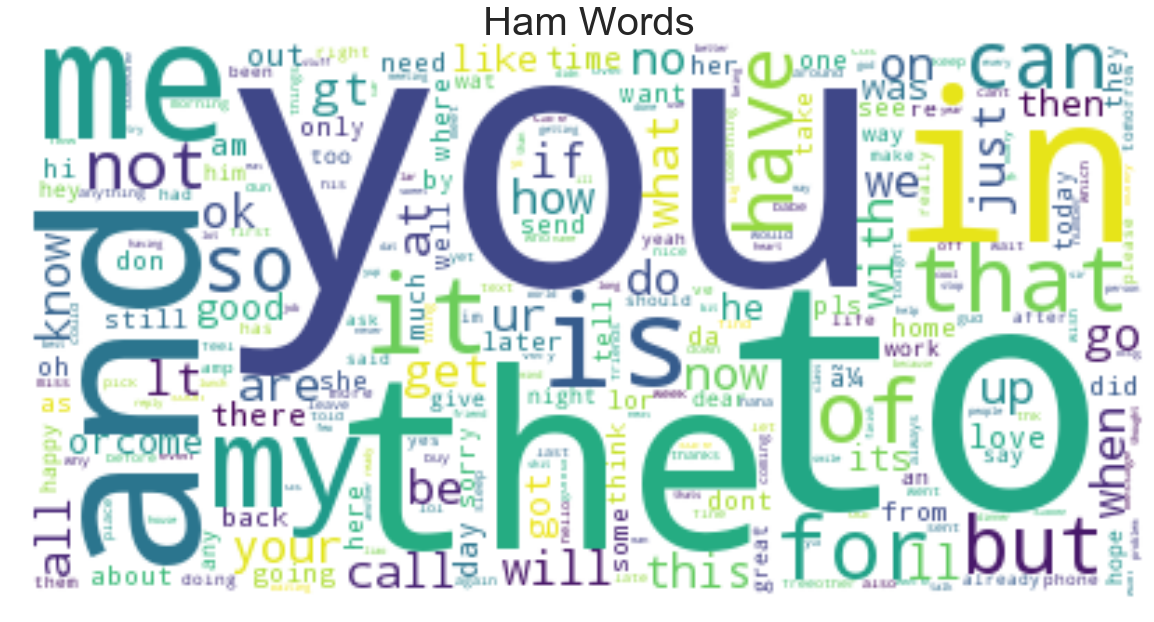

In [14]:
size = 20
fig = plt.figure(figsize=(size, size))
ax = plt.axes()
ax.set_title('Ham Words', size=40)
ax.imshow(wordcloudham, interpolation='bilinear')
ax.axis('off');

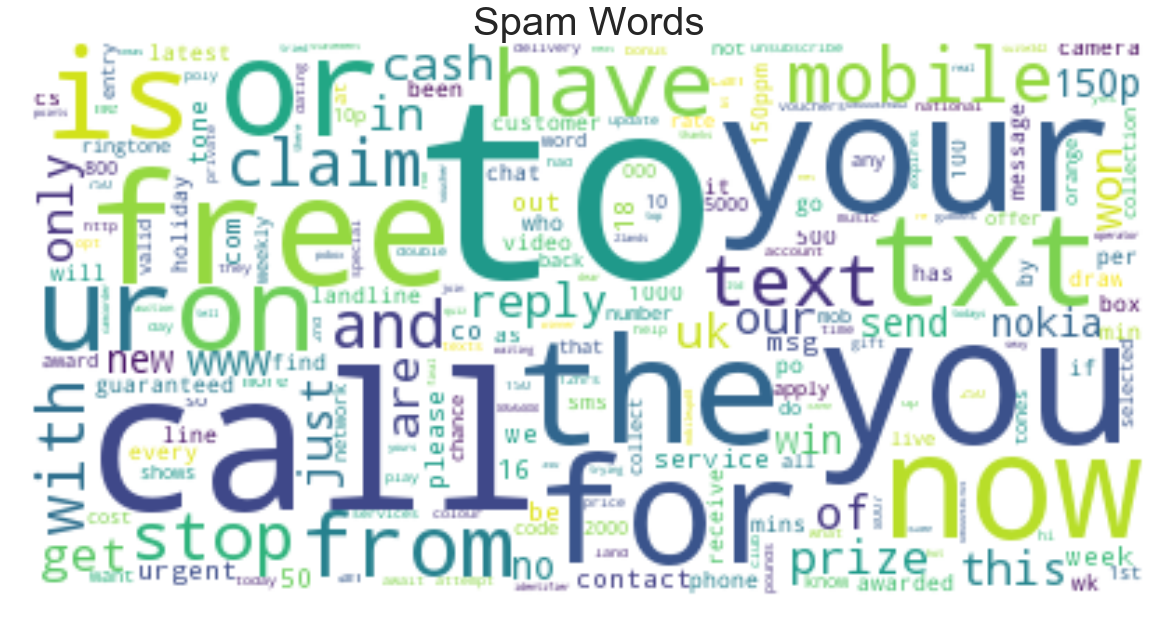

In [15]:
size = 20
fig = plt.figure(figsize=(size, size))
ax = plt.axes()
ax.set_title('Spam Words', size=40)
ax.imshow(wordcloudspam, interpolation='bilinear')
ax.axis('off');

5 - Naive Bayes can also be used for classification of continous data.  Generate a set of random data points, $x1$ and $x2$, classifiying each point as being above or below the line `f(x) = x`, fit a Naive Bayes model, report the accuracy, and plot the decision boundary.  Comment on your results.

In [16]:
# generate data
np.random.seed(687)
x1 = np.random.rand(100)
x2 = np.random.rand(100)

X_cont = np.vstack((x1, x2)).T
y_cont = np.array((x1 >= x2), dtype=int)

In [17]:
from sklearn.naive_bayes import GaussianNB
# fit model
NB_cont = GaussianNB()
NB_cont.fit(X_cont, y_cont)
# get accuracy
NB_cont.score(X_cont, y_cont)

0.94999999999999996

In [18]:
def plot_decision_boundary(X, y, classifier, resolution):
    # plot decision boundaries
    cmap = plt.cm.get_cmap('viridis')
    markers = ('o', '^', 's', 'x', 'v')
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # scatter points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=np.array(cmap.colors[idx]),
                    edgecolor='black',
                    marker=markers[idx],
                    label='cl'
                   )


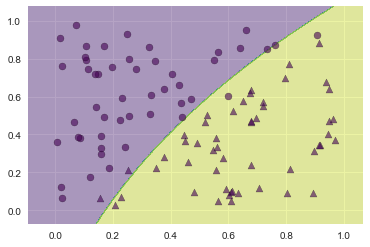

In [19]:
plot_decision_boundary(X_cont, y_cont, NB_cont, 0.002)

## K-Nearest Neighbor
Another one of the simplest of classificaiton algorithms is the K-Neareast Neighbors.  KNN works by simply classifying a datapoint by its proximity to other datapoints of known category.  There are a few different evaluation metrics to choose for "distance" as well as different implementations of the algorithm, but the idea is always the same.

1 - Generate a set of 100 random data points according to the function ${\displaystyle f(x) = N(x\;|\;\mu ,\sigma ^{2}) + \epsilon}$ where $\mu = 0$, $\sigma = 1$, and $\epsilon$ is a noise term.  Then classify each point as being above or below the curve, fit a KNN classifier, using the default values, and plot the decision boundary and report the accuracy.  Comment on your results.

In [20]:
from scipy.stats import norm
# generate data
np.random.seed(459)
a = -3
b = 3
# in solution it uses a linspace between -3 and 3
x1_KNN = (b - a)*np.random.rand(100) + a
a = -0.5
b = 0.5
noise = (b - a)*np.random.rand(100) + a
x2_KNN = norm.pdf(x1_KNN) + noise

X_KNN = np.vstack((x1_KNN, x2_KNN)).T
y_KNN = np.array((x2_KNN >= norm.pdf(x1_KNN)), dtype=int)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# fit model
KNN = KNeighborsClassifier()
KNN.fit(X_KNN, y_KNN)
# get accuracy
KNN.score(X_KNN, y_KNN)

0.95999999999999996

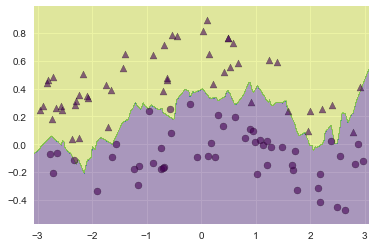

In [22]:
plot_decision_boundary(X_KNN, y_KNN, KNN, 0.002)

2 - Using the data generated in part (1), fit a series of KNN models, adjusting the `n_neighbors` parameter, and plot the decision boundary and accuracy for each.  Comment on your results.

KNN with 1 neighbors accuracy: 1.00000
KNN with 2 neighbors accuracy: 0.96000
KNN with 3 neighbors accuracy: 0.95000
KNN with 4 neighbors accuracy: 0.95000
KNN with 5 neighbors accuracy: 0.96000
KNN with 6 neighbors accuracy: 0.95000
KNN with 7 neighbors accuracy: 0.94000
KNN with 8 neighbors accuracy: 0.91000
KNN with 9 neighbors accuracy: 0.87000
KNN with 10 neighbors accuracy: 0.87000


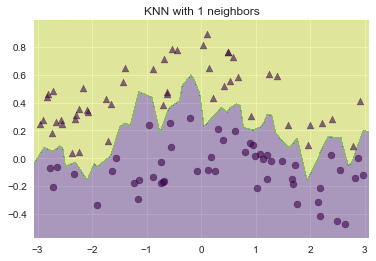

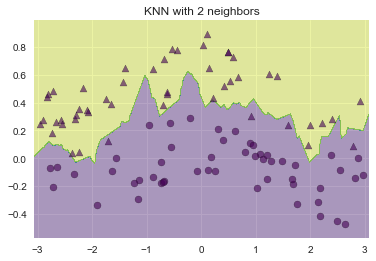

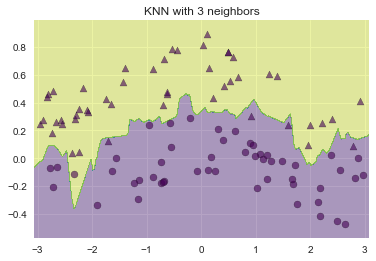

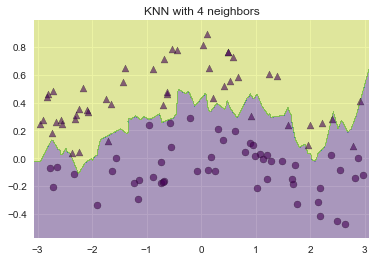

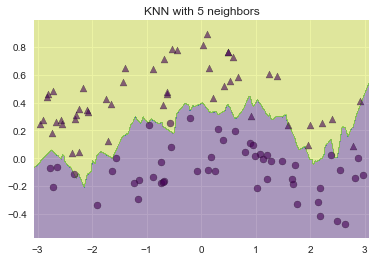

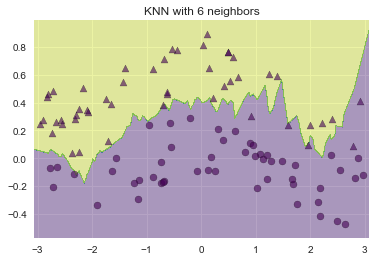

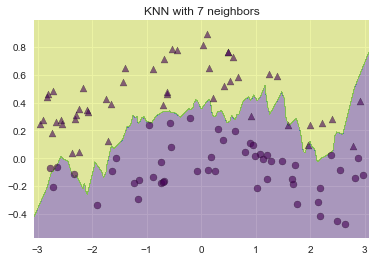

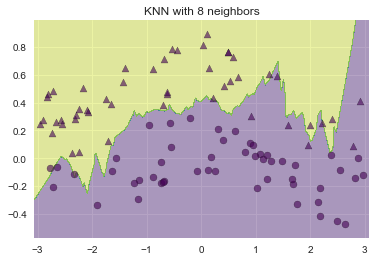

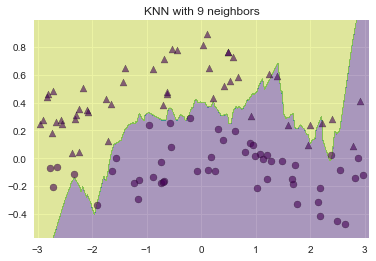

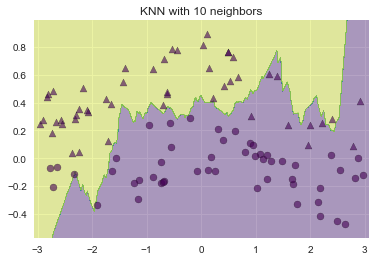

In [23]:
n_neighbors = np.arange(1, 11)
for n in n_neighbors:
    # set params
    KNN.set_params(n_neighbors=n)
    # fit
    KNN.fit(X_KNN, y_KNN)
    # get accuracy
    print('KNN with {} neighbors accuracy: {:.5f}'.format(n, KNN.score(X_KNN, y_KNN)))
    # plot boundaries
    fig, ax = plt.subplots(1, 1)
    ax.set_title('KNN with {} neighbors'.format(n))
    plot_decision_boundary(X_KNN, y_KNN, KNN, 0.002)

The best result is for 1 neighbors, but by looking at the decision boundaries we may get the best generalization for 2 neighbors. We also get good results for $n$ between 2 and 7, while performances decrease for 8 or more neighbors.

3 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Connectionist Bench (Sonar, Mines vs. Rocks) Data Set](http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/), put it into a data frame, and split into training and testing sets.  Be sure to familiarize yourself with the data before proceeding.

In [24]:
sonar = pd.read_csv('sonar.all-data', header=None)
sonar.columns = ['freq'+str(i) for i in range(60)] + ['class']

print(sonar.shape)
sonar.head()

(208, 61)


,freq0,freq1,freq2,freq3,freq4,freq5,freq6,freq7,freq8,freq9,...,freq51,freq52,freq53,freq54,freq55,freq56,freq57,freq58,freq59,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [25]:
sonar.describe().T

,count,mean,std,min,25%,50%,75%,max
freq0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
freq1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
freq2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
freq3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
freq4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
freq5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
freq6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
freq7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
freq8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
freq9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [26]:
sonar.loc[sonar['class'] == 'R'].describe().T

,count,mean,std,min,25%,50%,75%,max
freq0,97.0,0.022498,0.014687,0.0025,0.0123,0.0201,0.0291,0.0856
freq1,97.0,0.030303,0.024011,0.0006,0.0132,0.0242,0.0433,0.1632
freq2,97.0,0.035951,0.029101,0.0024,0.0145,0.0288,0.0501,0.1636
freq3,97.0,0.041447,0.031172,0.0058,0.0211,0.0350,0.0494,0.1732
freq4,97.0,0.062028,0.047217,0.0067,0.0305,0.0476,0.0794,0.2565
freq5,97.0,0.096224,0.065025,0.0102,0.0591,0.0792,0.1164,0.3823
freq6,97.0,0.114180,0.065155,0.0033,0.0731,0.1015,0.1422,0.3729
freq7,97.0,0.117596,0.079772,0.0057,0.0663,0.0973,0.1451,0.4110
freq8,97.0,0.137392,0.099887,0.0075,0.0743,0.1054,0.1598,0.5598
freq9,97.0,0.159325,0.113151,0.0242,0.0860,0.1264,0.1908,0.6194


In [27]:
sonar.loc[sonar['class'] == 'M'].describe().T

,count,mean,std,min,25%,50%,75%,max
freq0,111.0,0.034989,0.027074,0.0015,0.01795,0.0269,0.04185,0.1371
freq1,111.0,0.045544,0.037840,0.0017,0.01945,0.0353,0.05925,0.2339
freq2,111.0,0.050720,0.044014,0.0015,0.02525,0.0386,0.06250,0.3059
freq3,111.0,0.064768,0.054497,0.0061,0.03110,0.0547,0.08155,0.4264
freq4,111.0,0.086715,0.059790,0.0076,0.04590,0.0748,0.11170,0.4010
freq5,111.0,0.111864,0.052620,0.0116,0.07695,0.1091,0.14630,0.2770
freq6,111.0,0.128359,0.058179,0.0130,0.08800,0.1232,0.16160,0.3322
freq7,111.0,0.149832,0.087190,0.0055,0.09805,0.1298,0.18100,0.4590
freq8,111.0,0.213492,0.122237,0.0368,0.13695,0.1864,0.26105,0.6828
freq9,111.0,0.251022,0.137366,0.0113,0.16850,0.2245,0.30185,0.7106


In [28]:
X_sonar = sonar.iloc[:, :-1].values
y_sonar = sonar.iloc[:, -1].values

X_sonar_train, X_sonar_test, y_sonar_train, y_sonar_test = train_test_split(X_sonar, y_sonar, test_size=0.3, random_state = 42)

4 - Fit a KNN classifier using the default settings and report the training and testing accuracies.

In [29]:
KNN_sonar = KNeighborsClassifier()
KNN_sonar.fit(X_sonar_train, y_sonar_train)
print('Train accuracy: {:.5f}'.format(KNN_sonar.score(X_sonar_train, y_sonar_train)))
print('Test accuracy: {:.5f}'.format(KNN_sonar.score(X_sonar_test, y_sonar_test)))
# for random_State=42 test greater than train? mmh, strange... but for random_state=0 it's smaller

Train accuracy: 0.80690
Test accuracy: 0.84127


5 - Fit a series of KNN classifiers to the data, adjusting the `n_neighbors` parameter, reporting the training and testing accuracies for each.  Comment on your results.

In [29]:
n_neighbors = np.arange(1, 11)
for n in n_neighbors:
    # set params
    KNN_sonar.set_params(n_neighbors=n)
    # fit
    KNN_sonar.fit(X_sonar_train, y_sonar_train)
    # get accuracies
    print('KNN with {} neighbors train accuracy: {:.5f}'.format(n, KNN_sonar.score(X_sonar_train, y_sonar_train)))
    print('KNN with {} neighbors test accuracy: {:.5f}'.format(n, KNN_sonar.score(X_sonar_test, y_sonar_test)))

KNN with 1 neighbors train accuracy: 1.00000
KNN with 1 neighbors test accuracy: 0.90476
KNN with 2 neighbors train accuracy: 0.86207
KNN with 2 neighbors test accuracy: 0.84127
KNN with 3 neighbors train accuracy: 0.86207
KNN with 3 neighbors test accuracy: 0.88889
KNN with 4 neighbors train accuracy: 0.82759
KNN with 4 neighbors test accuracy: 0.85714
KNN with 5 neighbors train accuracy: 0.80690
KNN with 5 neighbors test accuracy: 0.84127
KNN with 6 neighbors train accuracy: 0.77931
KNN with 6 neighbors test accuracy: 0.73016
KNN with 7 neighbors train accuracy: 0.79310
KNN with 7 neighbors test accuracy: 0.74603
KNN with 8 neighbors train accuracy: 0.74483
KNN with 8 neighbors test accuracy: 0.73016
KNN with 9 neighbors train accuracy: 0.75862
KNN with 9 neighbors test accuracy: 0.73016
KNN with 10 neighbors train accuracy: 0.69655
KNN with 10 neighbors test accuracy: 0.74603


We have this strange phenomenon (to me at least) that for $n$ between 3 and 5 and $n = 10$ the test accuracy is greater than the train one.

As before, the best performance is for 1 neighbor and all the small $n$ give good accuracy scores.

6 - Repeat part (5), but this time adjusting the `metric` parameter.  Comment on your results.

In [30]:
n_neighbors = np.arange(1, 11)
for n in n_neighbors:
    # set params
    metric = 'chebyshev'
    KNN_sonar.set_params(n_neighbors=n, metric=metric)
    # fit
    KNN_sonar.fit(X_sonar_train, y_sonar_train)
    # get accuracies
    print('KNN with {} neighbors and {} metric train accuracy: {:.5f}'.format(n,
                                                                              metric,
                                                                              KNN_sonar.score(X_sonar_train, y_sonar_train)))
    print('KNN with {} neighbors and {} metric test accuracy: {:.5f}'.format(n,
                                                                             metric,
                                                                             KNN_sonar.score(X_sonar_test, y_sonar_test)))
    for p in np.arange(1, 6):
        # set params
        metric = 'minkowski'
        KNN_sonar.set_params(metric=metric, p=p)
        # fit
        KNN_sonar.fit(X_sonar_train, y_sonar_train)
        # get accuracies
        print('KNN with {} neighbors and {} {}-metric train accuracy: {:.5f}'.format(n,
                                                                                     metric,
                                                                                     p,
                                                                                     KNN_sonar.score(X_sonar_train, y_sonar_train)))
        print('KNN with {} neighbors and {} {}-metric test accuracy: {:.5f}'.format(n,
                                                                                    metric,
                                                                                    p,
                                                                                    KNN_sonar.score(X_sonar_test, y_sonar_test)))

KNN with 1 neighbors and chebyshev metric train accuracy: 1.00000
KNN with 1 neighbors and chebyshev metric test accuracy: 0.84127
KNN with 1 neighbors and minkowski 1-metric train accuracy: 1.00000
KNN with 1 neighbors and minkowski 1-metric test accuracy: 0.90476
KNN with 1 neighbors and minkowski 2-metric train accuracy: 1.00000
KNN with 1 neighbors and minkowski 2-metric test accuracy: 0.90476
KNN with 1 neighbors and minkowski 3-metric train accuracy: 1.00000
KNN with 1 neighbors and minkowski 3-metric test accuracy: 0.90476
KNN with 1 neighbors and minkowski 4-metric train accuracy: 1.00000
KNN with 1 neighbors and minkowski 4-metric test accuracy: 0.92063
KNN with 1 neighbors and minkowski 5-metric train accuracy: 1.00000
KNN with 1 neighbors and minkowski 5-metric test accuracy: 0.88889
KNN with 2 neighbors and chebyshev metric train accuracy: 0.82069
KNN with 2 neighbors and chebyshev metric test accuracy: 0.77778
KNN with 2 neighbors and minkowski 1-metric train accuracy: 0.8

The best scores in general are for Minkovski's metrics with small $n$ and $p$ between 1 and 3. The best test accuracy although is for $n = 1$ and $p = 4$.

## Logistic Regression
The final classification algorithm we'll work with here is Logistic Regression.  As its name implies, this technique makes use of the Logistic Function given by $$\sigma (t)={\frac {e^{t}}{e^{t}+1}}={\frac {1}{1+e^{-t}}}$$ which forms a bit of an S-shaped curve.  The intuition behind the this model is that, given a set of predictor variables, we want our response to collapse to a binary output, `0` or `1`.  As it turns out, this technique, although one of the oldest, tends to provide good results in a variety of problems, and is lightweight.

1 - Create a set of 100 random datapoints separated by the line $f(x) = x + \epsilon$, where $\epsilon$ is a noise term, classifying points as lying above or below the curve.  Fit a Logistic Regression model to your data, report the accuracy, and plot the decision boundary.  Comment on your results.

In [31]:
# generate data
np.random.seed(459)
a = -3
b = 3
# as before in solution linspace is used
x1_lr = (b - a)*np.random.rand(100) + a
a = -0.5
b = 0.5
noise = (b - a)*np.random.rand(100) + a
x2_lr = x1_lr + noise

X_lr = np.vstack((x1_lr, x2_lr)).T
y_lr = np.array((x2_lr >= x1_lr), dtype=int)

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_lr, y_lr)
lr.score(X_lr, y_lr)

0.93000000000000005

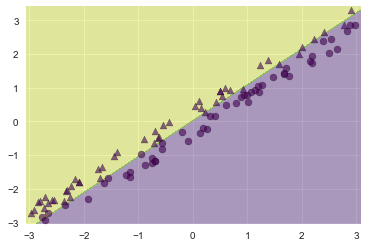

In [33]:
plot_decision_boundary(X_lr, y_lr, lr, 0.002)

2 - Repeat part (1), but this time having $f(x) = sin(x) + \epsilon$.

In [34]:
# generate data
np.random.seed(459)
a = -3
b = 3
x1_lr = (b - a)*np.random.rand(100) + a
a = -0.5
b = 0.5
noise = (b - a)*np.random.rand(100) + a
x2_lr = np.sin(x1_lr) + noise

X_lr = np.vstack((x1_lr, x2_lr)).T
y_lr = np.array((x2_lr >= np.sin(x1_lr)), dtype=int)

In [35]:
lr = LogisticRegression()
lr.fit(X_lr, y_lr)
lr.score(X_lr, y_lr)

0.77000000000000002

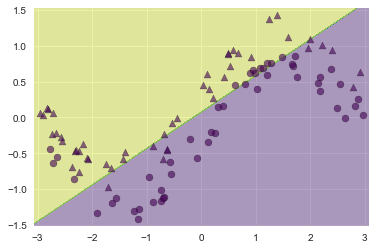

In [36]:
plot_decision_boundary(X_lr, y_lr, lr, 0.002)

3 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Chronic_Kidney_Disease Data Set](http://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease), put it into a data frame, drop all categorical variables, and split into training and testing sets.  Be sure to familiarize yourself with the data before proceeding.

In [37]:
kidney = pd.read_csv('chronic_kidney_disease_full.arff', header=None)
kidney.columns = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod',
                  'pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','class']
object_cols = [col for col in kidney.columns if kidney[col].dtype == object and col != 'class']
kidney.drop(object_cols, axis=1, inplace=True)
# solution: .drop(data.dtypes[data.dtypes == 'object'].index[:-1], axis=1)
kidney.dropna(inplace=True)
kidney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 3 to 399
Data columns (total 12 columns):
age      228 non-null float64
bp       228 non-null float64
sg       228 non-null float64
al       228 non-null float64
su       228 non-null float64
bgr      228 non-null float64
bu       228 non-null float64
sc       228 non-null float64
sod      228 non-null float64
pot      228 non-null float64
hemo     228 non-null float64
class    228 non-null object
dtypes: float64(11), object(1)
memory usage: 23.2+ KB


In [38]:
kidney.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,class
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,ckd
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,ckd
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,24.0,104.0,4.0,12.4,ckd
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,ckd
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,ckd


In [39]:
kidney.describe().T

,count,mean,std,min,25%,50%,75%,max
age,228.0,51.688596,15.866582,6.000,42.000,54.50,63.000,90.000
bp,228.0,75.131579,11.476091,50.000,70.000,80.00,80.000,110.000
sg,228.0,1.018684,0.005712,1.005,1.015,1.02,1.025,1.025
al,228.0,0.890351,1.367107,0.000,0.000,0.00,2.000,4.000
su,228.0,0.377193,0.974479,0.000,0.000,0.00,0.000,5.000
bgr,228.0,140.583333,76.804730,22.000,96.750,117.00,140.000,490.000
bu,228.0,53.978509,44.977444,1.500,26.000,41.00,54.250,309.000
sc,228.0,2.500877,3.402137,0.400,0.800,1.20,2.625,24.000
sod,228.0,138.412281,7.053367,104.000,135.000,139.00,142.000,150.000
pot,228.0,4.538596,2.920488,2.500,3.800,4.40,4.900,47.000


In [40]:
kidney.loc[kidney['class'] == 'ckd'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,101.0,57.673267,14.424361,6.000,49.00,60.000,67.000,90.000
bp,101.0,79.801980,12.882562,50.000,70.00,80.000,90.000,110.000
sg,101.0,1.013861,0.004893,1.005,1.01,1.015,1.015,1.025
al,101.0,2.009901,1.403532,0.000,1.00,2.000,3.000,4.000
su,101.0,0.851485,1.322015,0.000,0.00,0.000,2.000,5.000
bgr,101.0,182.386139,98.828029,22.000,107.00,157.000,242.000,490.000
bu,101.0,80.387129,56.179362,1.500,40.00,64.000,107.000,309.000
sc,101.0,4.549505,4.310490,0.600,1.70,2.800,5.600,24.000
sod,101.0,134.207921,7.276423,104.000,132.00,136.000,139.000,145.000
pot,101.0,4.805941,4.333909,2.500,3.90,4.200,4.900,47.000


In [41]:
kidney.loc[kidney['class'] == 'notckd'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,127.0,46.929134,15.390773,12.00,35.00,47.000,58.000,80.000
bp,127.0,71.417323,8.611953,60.00,60.00,70.000,80.000,80.000
sg,127.0,1.022520,0.002510,1.02,1.02,1.025,1.025,1.025
al,127.0,0.000000,0.000000,0.00,0.00,0.000,0.000,0.000
su,127.0,0.000000,0.000000,0.00,0.00,0.000,0.000,0.000
bgr,127.0,107.338583,19.005104,70.00,93.00,108.000,123.500,140.000
bu,127.0,32.976378,11.664942,10.00,23.00,33.000,44.000,50.000
sc,127.0,0.871654,0.258167,0.40,0.60,0.900,1.100,1.200
sod,127.0,141.755906,4.708514,135.00,138.00,141.000,146.000,150.000
pot,127.0,4.325984,0.596978,3.30,3.70,4.500,4.900,5.000


In [42]:
from sklearn.preprocessing import StandardScaler
# create matrices and setting classes to 0, 1
X_kidney = kidney.iloc[:, :-1].values
y_kidney = np.array([1 if cl == 'ckd' else 0 for cl in kidney.iloc[:, -1].values])
# train-test split
X_kidney_train, X_kidney_test, y_kidney_train, y_kidney_test = train_test_split(X_kidney, y_kidney, test_size=0.3, random_state=75)
# scaling
sc = StandardScaler()
sc.fit_transform(X_kidney_train)
X_kidney_train_std = sc.transform(X_kidney_train)
X_kidney_test_std = sc.transform(X_kidney_test)

4 - Fit a Logistic Regression model to the data, report the training and testing accuracies, and comment on your results.

In [43]:
lr_kidney = LogisticRegression()
lr_kidney.fit(X_kidney_train_std, y_kidney_train)
print('Train accuracy: {:.5f}'.format(lr_kidney.score(X_kidney_train_std, y_kidney_train)))
print('Test accuracy: {:.5f}'.format(lr_kidney.score(X_kidney_test_std, y_kidney_test)))

Train accuracy: 0.99371
Test accuracy: 0.98551


The model does a pretty good job classifying the patients with accuracies over 98.5% both in training and test set.

5 - Fit a series of Logistic Regression models for different values of the `C` hyperparameter of differing orders of magnitude, reporting the training and testing accuracies of each.  Comment on your results.

In [44]:
magnitudes = [10**i for i in range(-5, 6)]
for C in magnitudes:
    lr_kidney.set_params(C=C)
    lr_kidney.fit(X_kidney_train_std, y_kidney_train)
    print('Train accuracy for C = {}: {:.5f}'.format(C, lr_kidney.score(X_kidney_train_std, y_kidney_train)))
    print('Test accuracy for C = {}: {:.5f}'.format(C, lr_kidney.score(X_kidney_test_std, y_kidney_test)))

Train accuracy for C = 1e-05: 0.96226
Test accuracy for C = 1e-05: 0.94203
Train accuracy for C = 0.0001: 0.96226
Test accuracy for C = 0.0001: 0.94203
Train accuracy for C = 0.001: 0.96226
Test accuracy for C = 0.001: 0.94203
Train accuracy for C = 0.01: 0.96226
Test accuracy for C = 0.01: 0.95652
Train accuracy for C = 0.1: 0.96855
Test accuracy for C = 0.1: 0.97101
Train accuracy for C = 1: 0.99371
Test accuracy for C = 1: 0.98551
Train accuracy for C = 10: 1.00000
Test accuracy for C = 10: 0.98551
Train accuracy for C = 100: 1.00000
Test accuracy for C = 100: 0.98551
Train accuracy for C = 1000: 1.00000
Test accuracy for C = 1000: 0.97101
Train accuracy for C = 10000: 1.00000
Test accuracy for C = 10000: 0.97101
Train accuracy for C = 100000: 1.00000
Test accuracy for C = 100000: 0.97101


We can see that lowering the regularization the model fits perfectly the training set but it doesn't perform that well on the test set. In general the performances are very good for all the parameters, the best choice is $C = 1$, which is also the default.

6 - Experiment with different parameter settings to see if you can improve classification.  Be sure to report the training and testing accuracies and comment on your results.

In [45]:
cols = ['C', 'class_weight', 'penalty', 'train_score', 'test_score']
lrparams = pd.DataFrame(columns=cols)
magnitudes = [10**i for i in range(-5, 6)]
for C in magnitudes:
    # set params
    lr_kidney.set_params(C=C)
    for class_weight in [None, 'balanced']:
        # set params
        lr_kidney.set_params(class_weight=class_weight)
        for penalty in ['l2', 'l1']:
            # set params
            lr_kidney.set_params(penalty=penalty)
            # fit model
            lr_kidney.fit(X_kidney_train_std, y_kidney_train)
            # get accuracy
            lrparams = lrparams.append(pd.DataFrame([[C,
                                                      class_weight,
                                                      penalty,
                                                      lr_kidney.score(X_kidney_train_std, y_kidney_train),
                                                      lr_kidney.score(X_kidney_test_std, y_kidney_test)]],
                                                    columns=cols))

In [46]:
lrparams.sort_values(by='test_score', ascending=False)

,C,class_weight,penalty,train_score,test_score
0,1.00000,balanced,l2,1.000000,0.985507
0,10.00000,None,l2,1.000000,0.985507
0,1.00000,None,l2,0.993711,0.985507
0,10.00000,balanced,l2,1.000000,0.985507
0,0.10000,balanced,l2,0.968553,0.985507
0,100.00000,None,l2,1.000000,0.985507
0,100.00000,balanced,l2,1.000000,0.985507
0,10.00000,balanced,l1,1.000000,0.971014
0,100.00000,None,l1,1.000000,0.971014
0,100.00000,balanced,l1,1.000000,0.971014


In general l2 norms work better than l1, we have a few other optimal settings but they are tied to the first one in test set accuracy.

## Comparing Classifiers
As you may have suspected while working through the previous exercises, different algorithms are more suited to different kinds of problems which is what we will explore here.

1 - Create a set of 100 datapoints which are linearly separable, classifying the data as being above or below the curve.  Fit a Naive Bayes, KNN, and Logistic Regression model to your data, reporting the accuracies and plotting the decision boundaries.  Comment on your results.

In [47]:
# generate data
np.random.seed(459)
a = -3
b = 3
x1_linsep = (b - a)*np.random.rand(100) + a
a = -0.5
b = 0.5
noise = (b - a)*np.random.rand(100) + a
x2_linsep = x1_linsep + noise

X_linsep = np.vstack((x1_linsep, x2_linsep)).T
y_linsep = np.array((x2_linsep >= x1_linsep), dtype=int)

Gaussian Naive Bayes
Accuracy: 0.60000
K-Neighbours Classifier
Accuracy: 0.90000
Logistic Regression
Accuracy: 0.93000


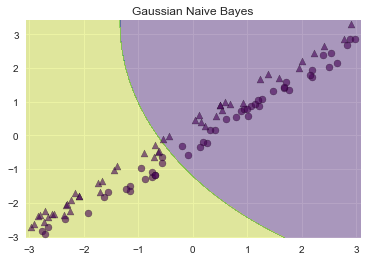

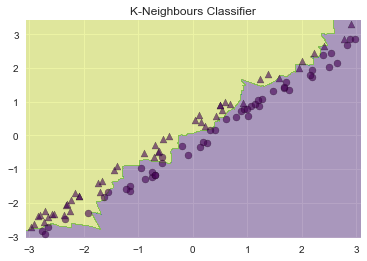

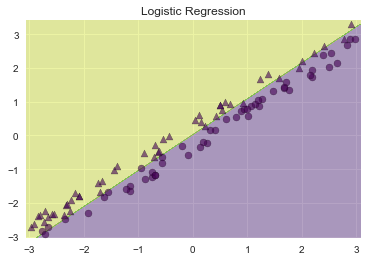

In [48]:
names = ['Gaussian Naive Bayes', 'K-Neighbours Classifier', 'Logistic Regression']
models = [GaussianNB(), KNeighborsClassifier(), LogisticRegression()]
for name, model in zip(names, models):
    # fit model
    model.fit(X_linsep, y_linsep)
    print(name)
    # get accuracy
    print('Accuracy: {:.5f}'.format(model.score(X_linsep, y_linsep)))
    # plot boundaries
    fig, ax = plt.subplots(1, 1)
    ax.set_title(name)
    plot_decision_boundary(X_linsep, y_linsep, model, 0.002)

Logistic regression works best, obviously. Maybe by tweaking the parameters we can get KNN to work as well (it seems to follow to much the noise, some regularization may help), while Naive Bayes seems way out in its predictions.

2 - Create a set of 200 random data points that lie on a unit circle displaced by some noise, categorizing each as being inside or outside the circle.  Stated analytically, select $x$ and $y$ such that $x^2 + y^2 = 1 + \epsilon$ where $\epsilon$ is a noise term.  Fit a Naive Bayes, KNN, and Logistic Regression model to your data, reporting the accuracies and plotting the decision boundaries.  Comment on your results.

In [49]:
# generate data
np.random.seed(459)
a = 0
b = 2*np.pi
angles = (b - a)*np.random.rand(200) + a
# generate noise
a = -0.5
b = 0.5
x_noise = (b - a)*np.random.rand(200) + a
y_noise = (b - a)*np.random.rand(200) + a
# fit angles to unit circle using sine and cosine
x1_circle = np.cos(angles) + x_noise
x2_circle = np.sin(angles) + y_noise

X_circle = np.vstack((x1_circle, x2_circle)).T
y_circle = np.array((x1_circle**2 + x2_circle**2 <= 1), dtype=int)

Gaussian Naive Bayes
Accuracy: 0.78500
K-Neighbours Classifier
Accuracy: 0.96500
Logistic Regression
Accuracy: 0.60500


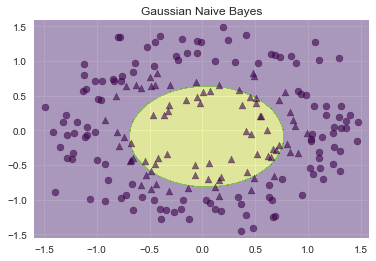

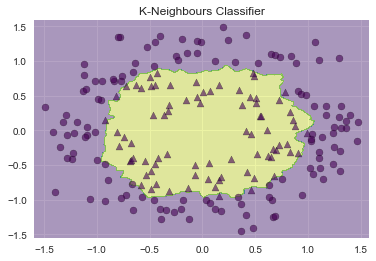

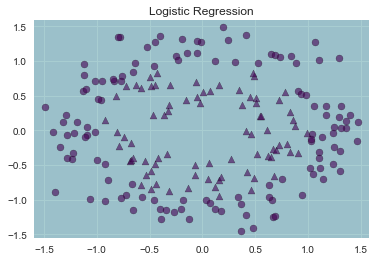

In [50]:
names = ['Gaussian Naive Bayes', 'K-Neighbours Classifier', 'Logistic Regression']
models = [GaussianNB(), KNeighborsClassifier(), LogisticRegression()]
for name, model in zip(names, models):
    # fit model
    model.fit(X_circle, y_circle)
    print(name)
    # get accuracy
    print('Accuracy: {:.5f}'.format(model.score(X_circle, y_circle)))
    # plot boundaries
    fig, ax = plt.subplots(1, 1)
    ax.set_title(name)
    plot_decision_boundary(X_circle, y_circle, model, 0.002)

I expected better from Naive Bayes, instead the boundary seems a circle but it is too small. The KNN is doing really well while, obviously again, logistic regression is the worst model for this data (and I really don't know what's going on with the plot...).

3 - Using the `SMS Spam` data set above, fit a KNN and Logistic Regression model to the data and report your training and testing accuracies.  Comment on your results.

In [51]:
names = ['Multinomial Naive Bayes', 'K-Neighbours Classifier', 'Logistic Regression']
models = [MultinomialNB(), KNeighborsClassifier(), LogisticRegression()]
for name, model in zip(names, models):
    # fit model
    model.fit(X_spam_train, y_spam_train)
    print(name)
    # get accuracy
    print('Train accuracy: {:.5f}'.format(model.score(X_spam_train, y_spam_train)))
    print('Test accuracy: {:.5f}'.format(model.score(X_spam_test, y_spam_test)))

Multinomial Naive Bayes
Train accuracy: 0.99282
Test accuracy: 0.98505
K-Neighbours Classifier
Train accuracy: 0.92564
Test accuracy: 0.91627
Logistic Regression
Train accuracy: 0.99821
Test accuracy: 0.98505


As expected multinomial is the best model, but logistic regression does equally good, while KNN, despite doing a pretty good too, takes a real long time to calculate predictions.

4 - Using the `Sonar` data set above, fit a Naive Bayes and Logistic Regression model to the data and report your training and testing accuracies.  Comment on your results.

In [52]:
names = ['K-Neighbours Classifier', 'Gaussian Naive Bayes', 'Logistic Regression']
models = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression()]
for name, model in zip(names, models):
    # fit model
    model.fit(X_sonar_train, y_sonar_train)
    print(name)
    # get accuracy
    print('Train accuracy: {:.5f}'.format(model.score(X_sonar_train, y_sonar_train)))
    print('Test accuracy: {:.5f}'.format(model.score(X_sonar_test, y_sonar_test)))

K-Neighbours Classifier
Train accuracy: 0.80690
Test accuracy: 0.84127
Gaussian Naive Bayes
Train accuracy: 0.73103
Test accuracy: 0.77778
Logistic Regression
Train accuracy: 0.78621
Test accuracy: 0.82540


Again the best model is the one used before (KNN), but logistic regression again performs quite well

5 - Using the `Kidney` data set above, fit a Naive Bayes and KNN model to the data and report your training and testing accuracies.  Comment on your results.  What can you say about your results overall in parts (3), (4), and (5)?

In [53]:
names = ['Logistic Regression', 'K-Neighbours Classifier', 'Gaussian Naive Bayes']
models = [LogisticRegression(), KNeighborsClassifier(), MultinomialNB()]
for name, model in zip(names, models):
    # fit model
    model.fit(X_kidney_train, y_kidney_train)
    print(name)
    # get accuracy
    print('Train accuracy: {:.5f}'.format(model.score(X_kidney_train, y_kidney_train)))
    print('Test accuracy: {:.5f}'.format(model.score(X_kidney_test, y_kidney_test)))

Logistic Regression
Train accuracy: 0.99371
Test accuracy: 0.97101
K-Neighbours Classifier
Train accuracy: 0.89937
Test accuracy: 0.92754
Gaussian Naive Bayes
Train accuracy: 0.88679
Test accuracy: 0.91304


All models perform quite well (and both the new models have higher test than training accuracy...), but none of them is near to the precision of logistic regression.

Overall we can say that the choice of a right model matters, especially with small datasets such as this; logistic regression seems to be the model that performs best across all datasets in this case.